In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



## Visualize the data

In [ ]:
df = pd.read_csv("XY_train.csv")



In [ ]:
df.head(5)

,Shares,Comments added,Likes (vs. dislikes) (%),Average view duration,Views,Subscribers,Impressions click-through rate (%)
0,2035.0,1578.0,97.95,0:09:32,4319500.0,3574.0,4.66
1,1070.0,1878.0,97.92,0:10:38,2522030.0,4845.0,5.14
2,1375.0,4314.0,97.54,0:09:31,3564849.0,8505.0,7.00
3,420.0,502.0,98.34,0:06:06,1148850.0,513.0,7.27
4,982.0,977.0,97.43,0:07:32,1559413.0,3865.0,5.08


In [ ]:
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Shares                              429 non-null    float64
 1   Comments added                      429 non-null    float64
 2   Likes (vs. dislikes) (%)            429 non-null    float64
 3   Average view duration               429 non-null    object 
 4   Views                               429 non-null    float64
 5   Subscribers                         429 non-null    float64
 6   Impressions click-through rate (%)  429 non-null    float64
dtypes: float64(6), object(1)
memory usage: 27.2+ KB


### Convert objects to numerical form

In [ ]:
def convert_to_seconds(time_str):
    """Converts a time string in HH:MM:SS format to seconds."""
    if isinstance(time_str, str):
        hours, minutes, seconds = map(int, time_str.split(':'))
        return hours * 3600 + minutes * 60 + seconds
    else:
        return time_str





In [ ]:
df['Average view duration'] = df['Average view duration'].apply(convert_to_seconds)

In [ ]:
df.head(5)

,Shares,Comments added,Likes (vs. dislikes) (%),Average view duration,Views,Subscribers,Impressions click-through rate (%)
0,2035.0,1578.0,97.95,572.0,4319500.0,3574.0,4.66
1,1070.0,1878.0,97.92,638.0,2522030.0,4845.0,5.14
2,1375.0,4314.0,97.54,571.0,3564849.0,8505.0,7.00
3,420.0,502.0,98.34,366.0,1148850.0,513.0,7.27
4,982.0,977.0,97.43,452.0,1559413.0,3865.0,5.08


In [ ]:
correlation_matrix = df.corr()

In [ ]:
correlation_matrix

,Shares,Comments added,Likes (vs. dislikes) (%),Average view duration,Views,Subscribers,Impressions click-through rate (%)
Shares,1.000000,0.438593,-0.218116,-0.061417,0.569114,0.535619,-0.166992
Comments added,0.438593,1.000000,-0.325950,0.102352,0.676782,0.614330,-0.160692
Likes (vs. dislikes) (%),-0.218116,-0.325950,1.000000,0.061439,-0.281083,-0.223176,0.069430
Average view duration,-0.061417,0.102352,0.061439,1.000000,-0.117328,-0.167363,-0.397481
Views,0.569114,0.676782,-0.281083,-0.117328,1.000000,0.905320,-0.127586
Subscribers,0.535619,0.614330,-0.223176,-0.167363,0.905320,1.000000,-0.168358
Impressions click-through rate (%),-0.166992,-0.160692,0.069430,-0.397481,-0.127586,-0.168358,1.000000


In [ ]:
correlation_with_views = correlation_matrix["Views"].sort_values(ascending=False)

In [ ]:
correlation_with_views

,Views
Views,1.000000
Subscribers,0.905320
Comments added,0.676782
Shares,0.569114
Average view duration,-0.117328
Impressions click-through rate (%),-0.127586
Likes (vs. dislikes) (%),-0.281083


- There is s strong positive relation between Subscribers and views i.e More subscribers implies more views

- On the other hand Likes (vs.dislike) has slighly negative relation

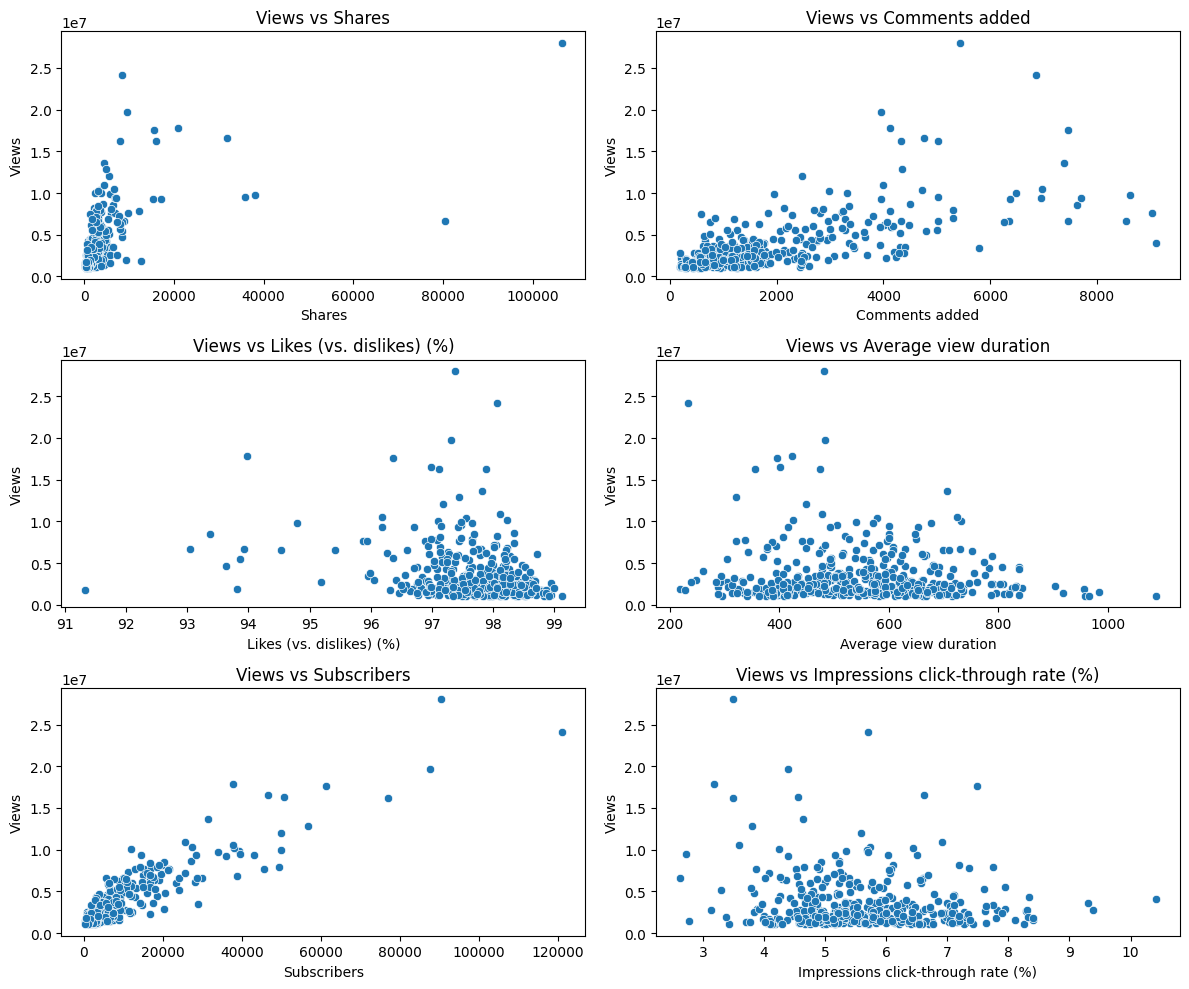

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



features = ['Shares', 'Comments added', 'Likes (vs. dislikes) (%)', 'Average view duration',
            'Subscribers', 'Impressions click-through rate (%)']


plt.figure(figsize=(12, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 2, i + 1)
    sns.scatterplot(x=df[feature], y=df['Views'])
    plt.xlabel(feature)
    plt.ylabel('Views')
    plt.title(f'Views vs {feature}')

plt.tight_layout()
plt.show()


- We can clearly see when subscribers getting increase the View also increased

- When the number of comment increased views also slightly increased

## Remove Null values

In [ ]:
print(df.isnull().sum())

Shares                                66
Comments added                        66
Likes (vs. dislikes) (%)              66
Average view duration                 66
Views                                 66
Subscribers                           66
Impressions click-through rate (%)    66
dtype: int64


In [ ]:
missing_rows = df[df.isnull().any(axis=1)]
print(missing_rows)

     Shares  Comments added  Likes (vs. dislikes) (%)  Average view duration  \
429     NaN             NaN                       NaN                    NaN   
430     NaN             NaN                       NaN                    NaN   
431     NaN             NaN                       NaN                    NaN   
432     NaN             NaN                       NaN                    NaN   
433     NaN             NaN                       NaN                    NaN   
..      ...             ...                       ...                    ...   
490     NaN             NaN                       NaN                    NaN   
491     NaN             NaN                       NaN                    NaN   
492     NaN             NaN                       NaN                    NaN   
493     NaN             NaN                       NaN                    NaN   
494     NaN             NaN                       NaN                    NaN   

     Views  Subscribers  Impressions cl

In [ ]:
df = df.dropna()

In [ ]:
print(df.isnull().sum())

Shares                                0
Comments added                        0
Likes (vs. dislikes) (%)              0
Average view duration                 0
Views                                 0
Subscribers                           0
Impressions click-through rate (%)    0
dtype: int64


## Scale inputs

In [ ]:
X = df.drop(columns=["Views"])
y = df["Views"]




In [ ]:
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
X_scaled.head(5)

,Shares,Comments added,Likes (vs. dislikes) (%),Average view duration,Subscribers,Impressions click-through rate (%)
0,0.017249,0.155907,0.849807,0.406897,0.026815,0.261538
1,0.008163,0.189531,0.845956,0.482759,0.037357,0.323077
2,0.011035,0.462564,0.797176,0.405747,0.067715,0.561538
3,0.002043,0.035306,0.899872,0.170115,0.001427,0.596154
4,0.007334,0.088545,0.783055,0.268966,0.029229,0.315385


## Split the data set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



## Perform Grid Search

In [ ]:
random_forest_model = RandomForestRegressor()



In [ ]:
forest_params = [{'max_depth': list(range(50, 60)), 'max_features': list(range(5,10)),'n_estimators':list(range(10,15))}]

clf = GridSearchCV(random_forest_model, forest_params, cv = 5, scoring='r2')
clf.fit(X_train, y_train)



GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=30, max_features=4,
                                             n_estimators=17),
             param_grid=[{'max_depth': [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
                          'max_features': [5, 6, 7, 8, 9],
                          'n_estimators': [10, 11, 12, 13, 14]}],
             scoring='r2')

In [ ]:
print(clf.best_params_)



{'max_depth': 52, 'max_features': 9, 'n_estimators': 14}


In [ ]:
random_forest_model = RandomForestRegressor(max_depth=52, max_features= 9, n_estimators=14)
random_forest_model.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 1010074.52
Mean Squared Error (MSE): 2666589550576.95
Root Mean Squared Error (RMSE): 1632969.55
R² Score: 0.8163


# XG Boost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xg_boost_params = [{'max_depth': list(range(60, 70)), 'n_estimators':list(range(10,15))}]

In [ ]:
xg_boost_model = XGBRegressor()

In [ ]:
clf_xg_boost = GridSearchCV(xg_boost_model, xg_boost_params, cv = 4, scoring='r2')
clf_xg_boost.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid=[{'max_depth': [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
                          'n_estimators': [10, 11, 12, 13, 14]}],
             scoring='r2')

In [ ]:
clf_xg_boost.best_params_

{'max_depth': 60, 'n_estimators': 14}

In [ ]:
xg_boost_model = XGBRegressor(max_depth=60, n_estimators=14)
xg_boost_model.fit(X_train, y_train)
y_pred = xg_boost_model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 1080356.81
Mean Squared Error (MSE): 3123321337555.40
Root Mean Squared Error (RMSE): 1767292.09
R² Score: 0.7849


# Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.metrics import R2Score # Change this line




# Define the Neural Network Model
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the Model
model.compile(
    loss='mse', optimizer='rmsprop',
    metrics=[R2Score()]
)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),  # Pass validation dataset
    epochs=50,
    batch_size=32,

)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 21483168464896.0000 - r2_score: -1.4142 - val_loss: 29547168792576.0000 - val_r2_score: -1.0353
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 18023006076928.0000 - r2_score: -1.5418 - val_loss: 29547164598272.0000 - val_r2_score: -1.0353
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 20688219930624.0000 - r2_score: -1.1972 - val_loss: 29547158306816.0000 - val_r2_score: -1.0353
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17966995341312.0000 - r2_score: -1.5814 - val_loss: 29547152015360.0000 - val_r2_score: -1.0353
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 23998129766400.0000 - r2_score: -0.9910 - val_loss: 29547145723904.0000 - val_r2_score: -1.0353
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 21267667222528.0000 - r2_score: -1.3518 - val_loss: 29547133140992.0000 - val_r2_score: -1.0353
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 18672521314304.0

## Best Model Selection  

For predicting continuous values, I tested three models:  

- **XGBoost Regressor**  
- **Random Forest Regressor**  
- **Simple Neural Network**  

These models were chosen because they are well-suited for regression tasks and are commonly used in predictive modeling.  

After evaluating their performance, I selected **Random Forest Regressor** as the best model since it achieved the highest **R² score** compared to the other two.  

However, if I had a **larger dataset**, I would prefer using a **Neural Network**, as it tends to deliver more promising results when trained on large amounts of data.

# Predict values for test data

In [ ]:
test_df = pd.read_csv("X_test.csv")

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Shares                              71 non-null     int64  
 1   Comments added                      71 non-null     int64  
 2   Likes (vs. dislikes) (%)            71 non-null     float64
 3   Average view duration               71 non-null     object 
 4   Subscribers                         71 non-null     int64  
 5   Impressions click-through rate (%)  71 non-null     float64
 6   Views prediction                    0 non-null      float64
dtypes: float64(3), int64(3), object(1)
memory usage: 4.0+ KB


In [ ]:
test_df

,Shares,Comments added,Likes (vs. dislikes) (%),Average view duration,Subscribers,Impressions click-through rate (%),Views prediction
0,27558,3243,95.66,00:11:10,28895,4.84,NaN
1,575,942,98.10,00:10:59,879,5.99,NaN
2,5362,1903,95.28,00:06:27,10362,5.98,NaN
3,1231,465,93.65,00:10:26,3119,5.35,NaN
4,4115,2126,97.16,00:13:42,10311,3.55,NaN
...,...,...,...,...,...,...,...
66,587,1895,98.66,00:07:08,4277,8.73,NaN
67,922,824,98.28,00:07:37,2621,4.74,NaN
68,1141,2196,97.93,00:12:46,5965,5.10,NaN
69,1292,576,98.39,00:09:58,939,5.76,NaN


In [ ]:
test_df.isnull().sum()

,0
Shares,0
Comments added,0
Likes (vs. dislikes) (%),0
Average view duration,0
Subscribers,0
Impressions click-through rate (%),0
Views prediction,71


In [ ]:
test_df_X = test_df.drop(columns=['Views prediction'])

In [ ]:
test_df_X['Average view duration'] = test_df_X['Average view duration'].apply(convert_to_seconds)

In [ ]:
test_df_X_scaled = pd.DataFrame(scaler.transform(test_df_X), columns=test_df_X.columns)

In [ ]:
test_df_X_scaled

,Shares,Comments added,Likes (vs. dislikes) (%),Average view duration,Subscribers,Impressions click-through rate (%)
0,0.257553,0.342524,0.555841,0.519540,0.236835,0.284615
1,0.003502,0.084622,0.869063,0.506897,0.004462,0.432051
2,0.048573,0.192334,0.507060,0.194253,0.083117,0.430769
3,0.009679,0.031159,0.297818,0.468966,0.023042,0.350000
4,0.036832,0.217328,0.748395,0.694253,0.082694,0.119231
...,...,...,...,...,...,...
66,0.003615,0.191437,0.940950,0.241379,0.032646,0.783333
67,0.006770,0.071397,0.892169,0.274713,0.018911,0.271795
68,0.008831,0.225174,0.847240,0.629885,0.046647,0.317949
69,0.010253,0.043600,0.906290,0.436782,0.004960,0.402564


In [ ]:
test_df_predictions = random_forest_model.predict(test_df_X_scaled)

In [ ]:
test_df_predictions

array([ 6442958.64285714,  1767738.07142857,  4189588.78571429,
        1872568.28571429,  4466525.35714286,  4499197.42857143,
        5439757.42857143,  7266704.5       ,  4048594.42857143,
        3751228.78571429,  9460231.        ,  2933816.14285714,
        3857379.71428571,  3641768.5       ,  1243576.5       ,
        1944512.57142857,  4039862.78571429,  1226248.85714286,
        1543361.28571429,  1618479.28571429,  6674764.78571429,
        3697771.42857143,  3604481.42857143,  1999876.42857143,
       10305883.28571429,  3813610.21428571,  2746343.        ,
        1656143.92857143,  2264941.85714286,  2119412.71428571,
        3284619.64285714,  4750669.07142857,  2133548.5       ,
        1522078.35714286,  5055446.14285714,  2756865.57142857,
        1281714.28571429,  1484123.64285714,  1220478.57142857,
        5995457.71428571,  1458175.71428571,  6577233.64285714,
        2030601.64285714,  3342129.28571429,  4578880.71428571,
        2634600.42857143,  7516888.28571

In [ ]:
rounded_values = np.round(test_df_predictions).astype(float)

In [ ]:
test_df['Views prediction'] = rounded_values

In [ ]:
test_df.head(5)

,Shares,Comments added,Likes (vs. dislikes) (%),Average view duration,Subscribers,Impressions click-through rate (%),Views prediction
0,27558,3243,95.66,00:11:10,28895,4.84,6442959.0
1,575,942,98.10,00:10:59,879,5.99,1767738.0
2,5362,1903,95.28,00:06:27,10362,5.98,4189589.0
3,1231,465,93.65,00:10:26,3119,5.35,1872568.0
4,4115,2126,97.16,00:13:42,10311,3.55,4466525.0


In [ ]:
test_df.to_csv('X_test_with_predictions.csv', index=False)